In [1]:
FluTrain = read.csv("./data/FluTrain.csv")
str(FluTrain)

'data.frame':	417 obs. of  3 variables:
 $ Week   : Factor w/ 417 levels "2004-01-04 - 2004-01-10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ILI    : num  2.42 1.81 1.71 1.54 1.44 ...
 $ Queries: num  0.238 0.22 0.226 0.238 0.224 ...


In [3]:
which.max(FluTrain$ILI)#Problem 1.1

[1] 303

In [4]:
FluTrain$Week[303]

[1] 2009-10-18 - 2009-10-24
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

In [5]:
which.max(FluTrain$Queries)

[1] 303

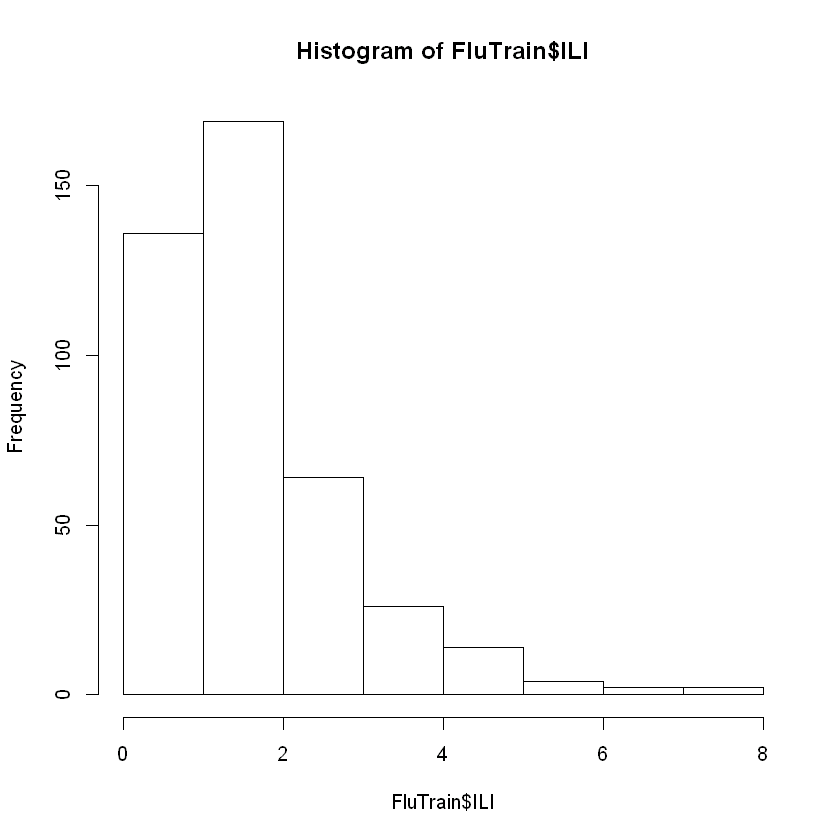

In [6]:
hist(FluTrain$ILI)#Problem 1.2

In [7]:
FluTrain$logILI = log(FluTrain$ILI)

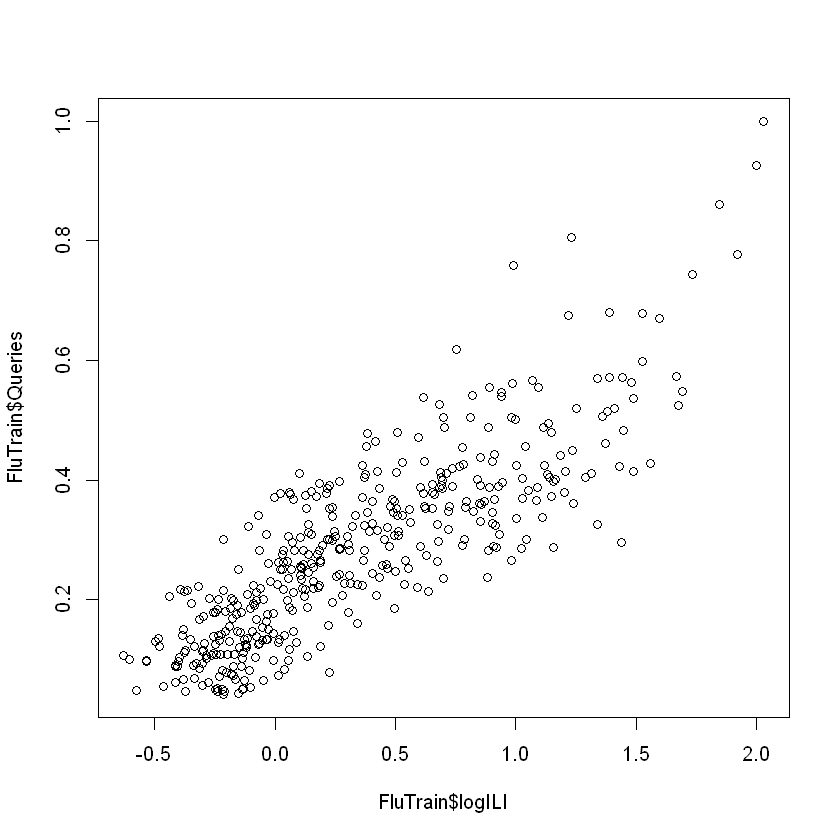

In [9]:
plot(FluTrain$logILI, FluTrain$Queries)#Problem 1.3

In [10]:
FluTrend1 = lm(logILI ~ Queries, data=FluTrain)
summary(FluTrend1)#Problem 2.2


Call:
lm(formula = logILI ~ Queries, data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


In [12]:
cor(FluTrain$logILI, FluTrain$Queries)^2#Problem 2.3

[1] 0.7090201

In [13]:
FluTest = read.csv("./data/FluTest.csv")

In [15]:
predTest1 = exp(predict(FluTrend1, newdata=FluTest))

In [23]:
which(FluTest$Week == "2012-03-11 - 2012-03-17")

[1] 11

In [24]:
predTest1[11]#Problem 3.1

11 
2.187378

In [26]:
(FluTest$ILI[11] - predTest1[11])/FluTest$ILI[11]#Problem 3.2

11 
0.04623827

In [27]:
SSE = sum((FluTest$ILI - predTest1)^2)
RMSE = sqrt(SSE/nrow(FluTest))
RMSE#Problem 3.3

[1] 0.7490645

想办法下载了`zoo`库。这是个时间序列库。

In [30]:
library(zoo)

In [31]:
ILILag2 = lag(zoo(FluTrain$ILI), -2, na.pad=TRUE)
FluTrain$ILILag2 = coredata(ILILag2)

In [33]:
summary(FluTrain$ILILag2)#Problem 4.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.5341  0.9010  1.2520  1.6750  2.0580  7.6190       2 

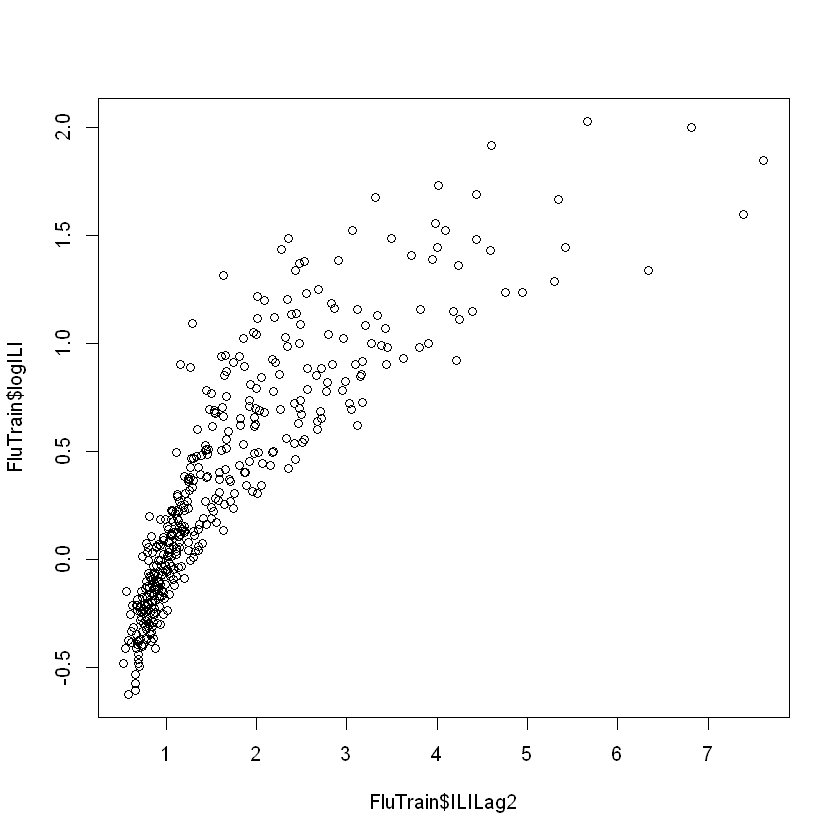

In [34]:
plot(FluTrain$ILILag2, FluTrain$logILI)#Problem 4.2

In [37]:
FluTrend2 = lm(logILI ~ Queries + log(ILILag2), data=FluTrain)
summary(FluTrend2)#Problem 4.3


Call:
lm(formula = logILI ~ Queries + log(ILILag2), data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52209 -0.11082 -0.01819  0.08143  0.76785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24064    0.01953  -12.32   <2e-16 ***
Queries       1.25578    0.07910   15.88   <2e-16 ***
log(ILILag2)  0.65569    0.02251   29.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1703 on 412 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9059 
F-statistic:  1993 on 2 and 412 DF,  p-value: < 2.2e-16


In [38]:
ILILag2 = lag(zoo(FluTest$ILI), -2, na.pad=TRUE)
FluTest$ILILag2 = coredata(ILILag2)

In [39]:
summary(FluTest$ILILag2)#Problem 5.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.9018  1.1360  1.3410  1.5190  1.7610  3.6000       2 

In [40]:
FluTest$ILILag2[1] = FluTrain$ILI[nrow(FluTrain)-1]
FluTest$ILILag2[2] = FluTrain$ILI[nrow(FluTrain)]

In [41]:
FluTest$ILILag2[1]#Problem 5.3

[1] 1.852736

In [42]:
FluTest$ILILag2[2]

[1] 2.12413

In [43]:
predTest2 = exp(predict(FluTrend2, newdata=FluTest))
SSE = sum((FluTest$ILI - predTest2)^2)
RMSE = sqrt(SSE/nrow(FluTest))
RMSE

[1] 0.2942029